In [69]:
from cleaning import get_clean_data,get_data,plot_accidents
import numpy as np
import matplotlib.pyplot as plt
data = get_clean_data()

    CRASH_CRN  DISTRICT  CRASH_COUNTY  MUNICIPALITY POLICE_AGCY  CRASH_YEAR  \
0  2004000001        11             2          2454       02454        2004   
1  2004000010        11             2          2440       02440        2004   
2  2004000016        11             2          2203       02203        2004   
3  2004000022        11             2          2404       02404        2004   
4  2004000030        11             2          2419       02419        2004   

   CRASH_MONTH  DAY_OF_WEEK  TIME_OF_DAY  HOUR_OF_DAY  ...  LANE_COUNT  \
0            1            5        257.0          2.0  ...         2.0   
1            1            5       1027.0         10.0  ...         2.0   
2            1            5       1839.0         18.0  ...         2.0   
3            1            6        914.0          9.0  ...         2.0   
4            1            5       2230.0         22.0  ...         2.0   

   RDWY_ORIENT  ROAD_OWNER  ROUTE  SPEED_LIMIT  SEGMENT  OFFSET  \
0            

<bound method NDFrame.head of         CRASH_MONTH  DAY_OF_WEEK  HOUR_OF_DAY  ILLUMINATION  WEATHER  \
0                 1            5          2.0             2      1.0   
1                 1            5         10.0             1      1.0   
2                 1            5         18.0             2      1.0   
6                 1            6         14.0             1      1.0   
11                1            1         19.0             3      2.0   
...             ...          ...          ...           ...      ...   
182777            7            5         18.0             1      1.0   
182778            8            7          7.0             1      1.0   
182779            9            3         15.0             1      1.0   
182780           10            7         15.0             1      1.0   
182781           11            7         19.0             3      1.0   

        ROAD_CONDITION  COLLISION_TYPE  RELATION_TO_ROAD  INTERSECT_TYPE  \
0                  0.0       

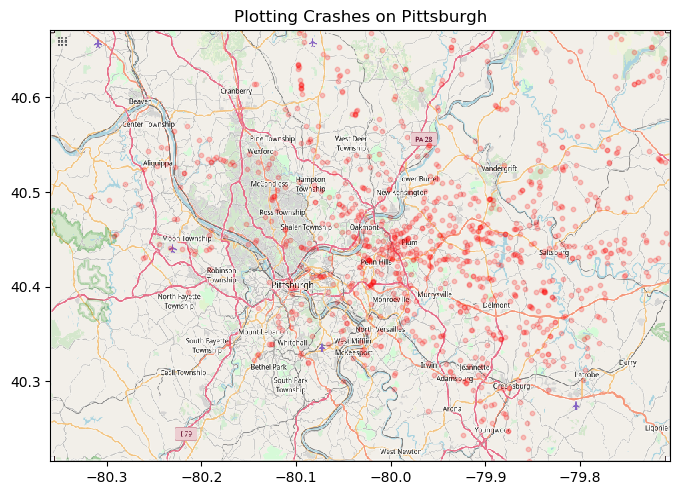

In [75]:
plot_accidents(get_data("crash.csv"))

Sevirity precentages:

Not injured        50.62%
Minor injury       19.32%
Injury Unknown     14.47%
Moderate injury    9.405%
Unknown            3.663%
Major injury       1.968%
Killed             0.537%
Name: MAX_SEVERITY_LEVEL, dtype: object


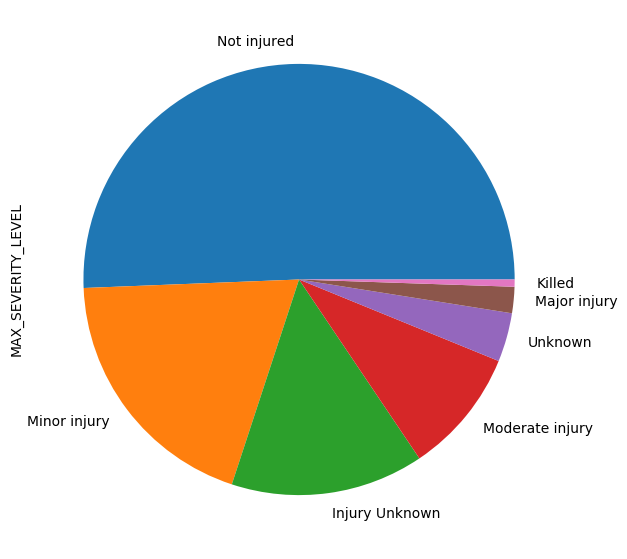

In [140]:
#first figuer pie char of injury level

labels={
0:'Not injured',
1:'Killed',
2:'Major injury',
3:'Moderate injury',
4:'Minor injury',
8:'Injury Unknown',
9:'Unknown'}
severity_data=data['MAX_SEVERITY_LEVEL'].value_counts()
severity_data= severity_data.rename(labels)
severity_data.plot.pie(figsize=(7,7))
total = severity_data.sum()
sev = severity_data.apply(lambda x: str(x/total*100)[:5]+'%')
print('Sevirity precentages:\n')
print(sev)

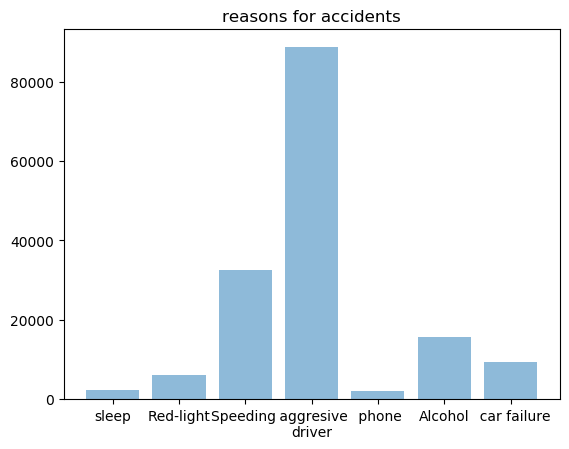

In [82]:
#second figure : reasons for accidents:
reasons=[
'FATIGUE_ASLEEP',
# 'RUNNING_STOP_SIGN',
'RUNNING_RED_LT',
'SPEEDING_RELATED',
'AGGRESSIVE_DRIVING',
'CELL_PHONE',
'ALCOHOL_RELATED',
'VEHICLE_FAILURE'
]
labels = ['sleep','Red-light','Speeding ',' aggresive\ndriver',' phone','Alcohol','  car failure']
total =0
counts=[]
for i in reasons:
    total+=len(data[data[i]==1].index)
    counts.append(len(data[data[i]==1].index))
y_pos = np.arange(len(reasons))
plt.rcdefaults()
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.title('reasons for accidents')
plt.show()


In [85]:
#feature engineering
#creat new categorical column for time of day
import pandas as pd
data = get_data("crash.csv")
f = data['TIME_OF_DAY'].dropna()
f = data.loc[(data.TIME_OF_DAY > 0) & (data.TIME_OF_DAY < 2400)]

bins = [-np.inf,600,1200,1800,2400]

labels=['late night','morning','afternoon','night']

f['time'] = pd.cut(data.TIME_OF_DAY, bins=bins, labels=labels)

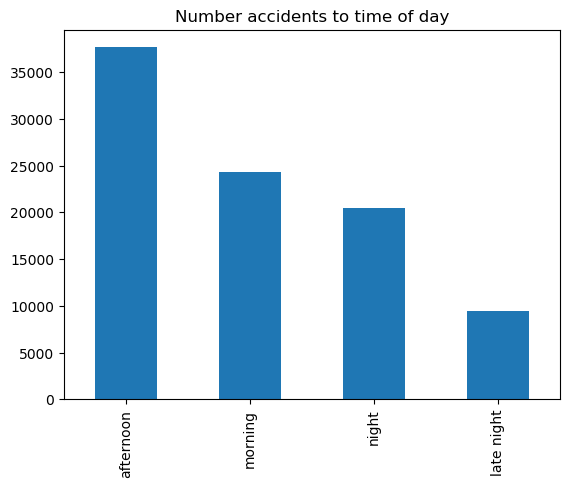

In [87]:
#figure 3 : accidents per time of day
#late night:12am-6am, morning :6am-12pm , afternoon: 12 - 6pm, night :6 - 12am
plt.title('Number accidents to time of day')
f['time'].value_counts().plot(kind='bar')


count       10.000000
mean     18278.200000
std      21088.001838
min        359.000000
25%       4532.500000
50%       7363.000000
75%      37786.000000
max      49347.000000
Name: COLLISION_TYPE, dtype: float64

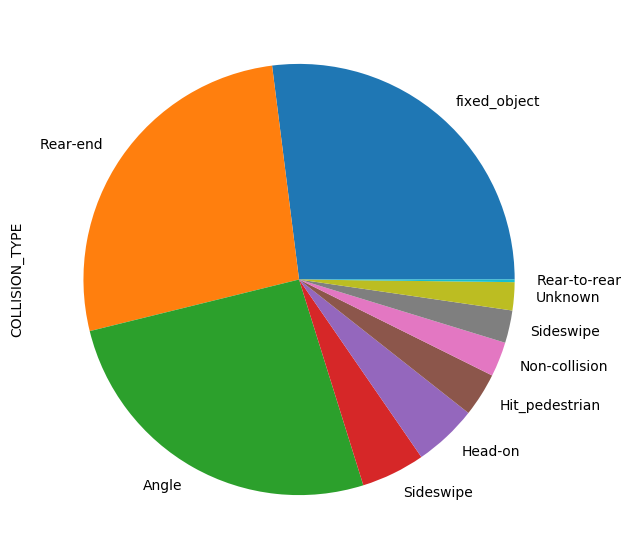

In [63]:
#figure 4 type of collision


lab={
0 : 'Non-collision',
1 : 'Rear-end',
2 : 'Head-on',
3 : 'Rear-to-rear',
4 : 'Angle',
5 : 'Sideswipe' ,
6 : 'Sideswipe' , 
7 : 'fixed_object',
8 : 'Hit_pedestrian',
9 : 'Unknown'}
col_data=data['COLLISION_TYPE'].value_counts()

col_data= col_data.rename(lab)
col_data.plot.pie(figsize=(7,7))


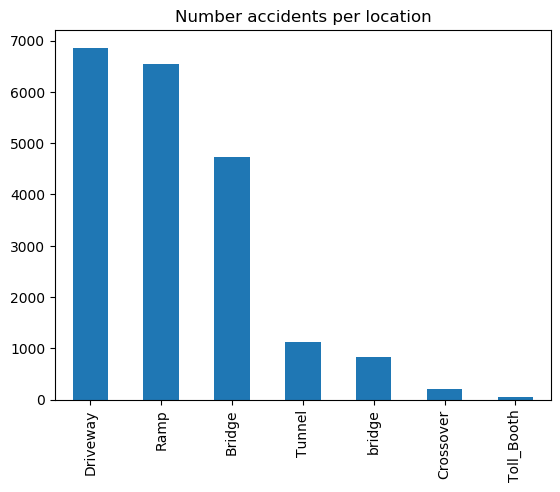

In [98]:
loc={
    
    1 : 'Underpass',
    2 : 'Ramp',
    3 : 'Bridge',
    4 : 'Tunnel',
    5 : 'Toll_Booth',
    6 : 'Crossover',
    7 : 'Driveway', 
    8 : 'bridge',
}

loc_data = data.loc[(data.LOCATION_TYPE > 1) & (data.LOCATION_TYPE < 9)]
loc_data=loc_data['LOCATION_TYPE'].value_counts().rename(loc)
plt.title('Number accidents per location')
loc_data.plot(kind='bar')


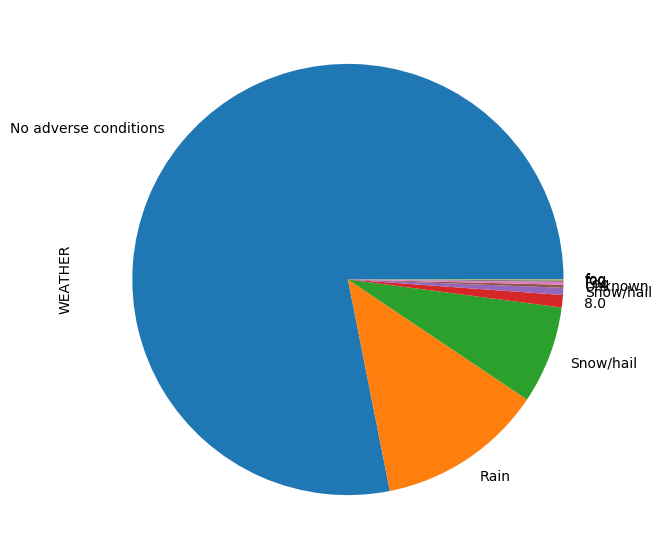

In [52]:
weather={
1 : 'No adverse conditions',
2 : 'Rain',
3 : 'Snow/hail',
5 : 'Fog',
6 : 'fog',
7 : 'fog',
9 : 'Unknown'}

weather_data=data['WEATHER'].value_counts()
weather_data= weather_data.rename(weather)
weather_data.plot.pie(figsize=(7,7))


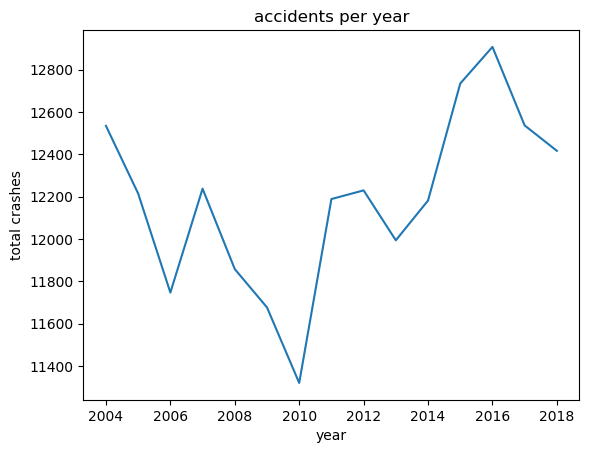

In [122]:
#plot of accidents per year
d = data
d['count']=1
d =data.groupby('CRASH_YEAR').agg(['sum']).reset_index()
x,y = d['CRASH_YEAR'],d['count']
plt.title('accidents per year')
plt.xlabel('year')
plt.ylabel('total crashes')
plt.plot(x,y)
# 

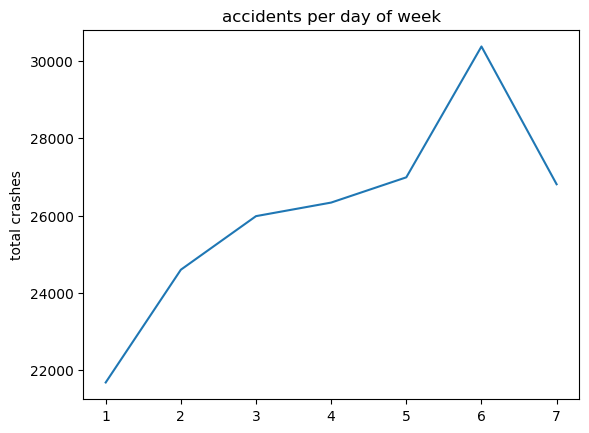

In [144]:

d = data
d['count']=1
d =data.groupby('DAY_OF_WEEK').agg(['sum']).reset_index()
x,y = d['DAY_OF_WEEK'],d['count']
plt.title('accidents per day of week')

plt.ylabel('total crashes')

plt.xticks=(np.arange(7), ('Sunday','Monday','Tuesday','Wensday','Thursday','Friday','Saturday'))

plt.plot(x,y)
